## Simulating Clifford Circuits in Pennylane

In this notebook, I use pennylane.ai to efficiently simulate 3 clifford circuits with varying depth.

In [19]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit

# constructing stabilizer (clifford) circuits
dev1 = qml.device("default.clifford", wires=2)
dev2 = qml.device("default.clifford", wires=2)
dev3 = qml.device("default.clifford", wires=4)

@qml.qnode(dev1)
# clifford 1 has 2 quibits with a depth of 3
def clifford1(return_state=True):
    qml.X(wires=[0])
    qml.CNOT(wires=[0, 1])
    qml.S(wires=[0])
    qml.Hadamard(wires=[1])
    return qml.probs(), ([qml.state()] if return_state else [])

@qml.qnode(dev2)
# clifford 1 has 2 quibits with a depth of 5
def clifford2(return_state=True):
    qml.Hadamard(wires=[0])
    qml.X(wires=[0])
    qml.CY(wires=[0, 1])
    qml.Z(wires=[1])
    qml.S(wires=[1])
    return qml.probs(), ([qml.state()] if return_state else [])

@qml.qnode(dev3)
# clifford 1 has 4 quibits with a depth of 5
def clifford3(return_state=True):
    qml.S(wires=[0])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=[1])
    qml.CY(wires=[1, 2])
    qml.adjoint(qml.S(wires=[2]))
    qml.CZ(wires=[2, 3])
    return qml.probs(), ([qml.state()] if return_state else [])

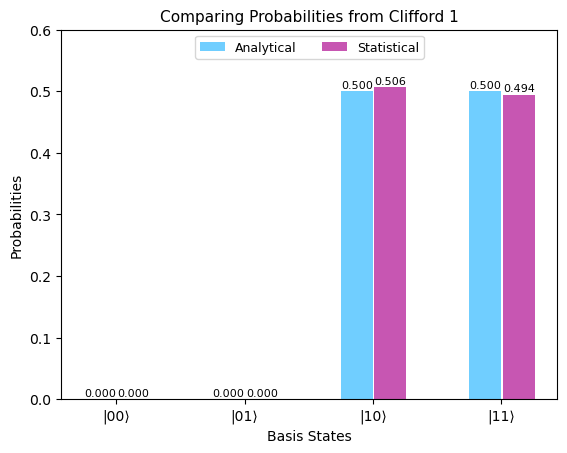

In [20]:


# Get analytical results
probs1, state1 = clifford1(return_state=True)

# Get the statistical results with 10000 shots
shot_probs1, _ = clifford1(return_state=False, shots=10000)

# Define computational basis states
basis_states = ["|00⟩", "|01⟩", "|10⟩", "|11⟩"]

# Plot the probabilities
bar_width, bar_space = 0.25, 0.01
colors = ["#70CEFF", "#C756B2"]
labels = ["Analytical", "Statistical"]
for idx, prob in enumerate([probs1, shot_probs1]):
    bars = plt.bar(
        np.arange(4) + idx * (bar_width + bar_space), prob,
        width=bar_width, label=labels[idx], color=colors[idx],
    )
    plt.bar_label(bars, padding=1, fmt="%.3f", fontsize=8)

# Add labels and show
plt.title("Comparing Probabilities from Clifford 1", fontsize=11)
plt.xlabel("Basis States")
plt.ylabel("Probabilities")
plt.xticks(np.arange(4) + bar_width / 2, basis_states)
plt.ylim(0.0, 0.60)
plt.legend(loc="upper center", ncols=2, fontsize=9)
plt.show()

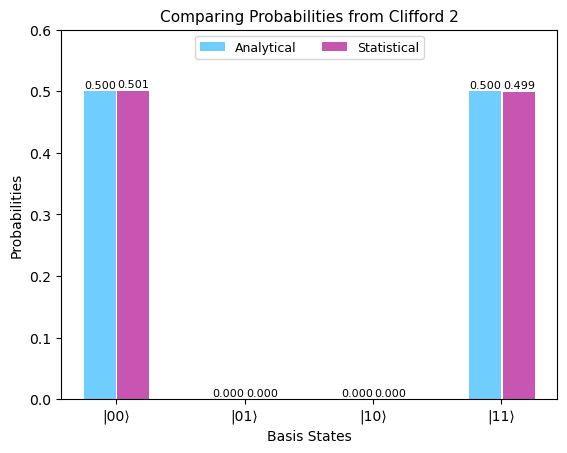

In [21]:
# Get analytical results
probs2, state2 = clifford2(return_state=True)

# Get the statistical results with 10000 shots
shot_probs2, _= clifford2(return_state=False, shots=10000)

# Define computational basis states
basis_states = ["|00⟩", "|01⟩", "|10⟩", "|11⟩"]

# Plot the probabilities
bar_width, bar_space = 0.25, 0.01
colors = ["#70CEFF", "#C756B2"]
labels = ["Analytical", "Statistical"]
for idx, prob in enumerate([probs2, shot_probs2]):
    bars = plt.bar(
        np.arange(4) + idx * (bar_width + bar_space), prob,
        width=bar_width, label=labels[idx], color=colors[idx],
    )
    plt.bar_label(bars, padding=1, fmt="%.3f", fontsize=8)

# Add labels and show
plt.title("Comparing Probabilities from Clifford 2", fontsize=11)
plt.xlabel("Basis States")
plt.ylabel("Probabilities")
plt.xticks(np.arange(4) + bar_width / 2, basis_states)
plt.ylim(0.0, 0.60)
plt.legend(loc="upper center", ncols=2, fontsize=9)
plt.show()

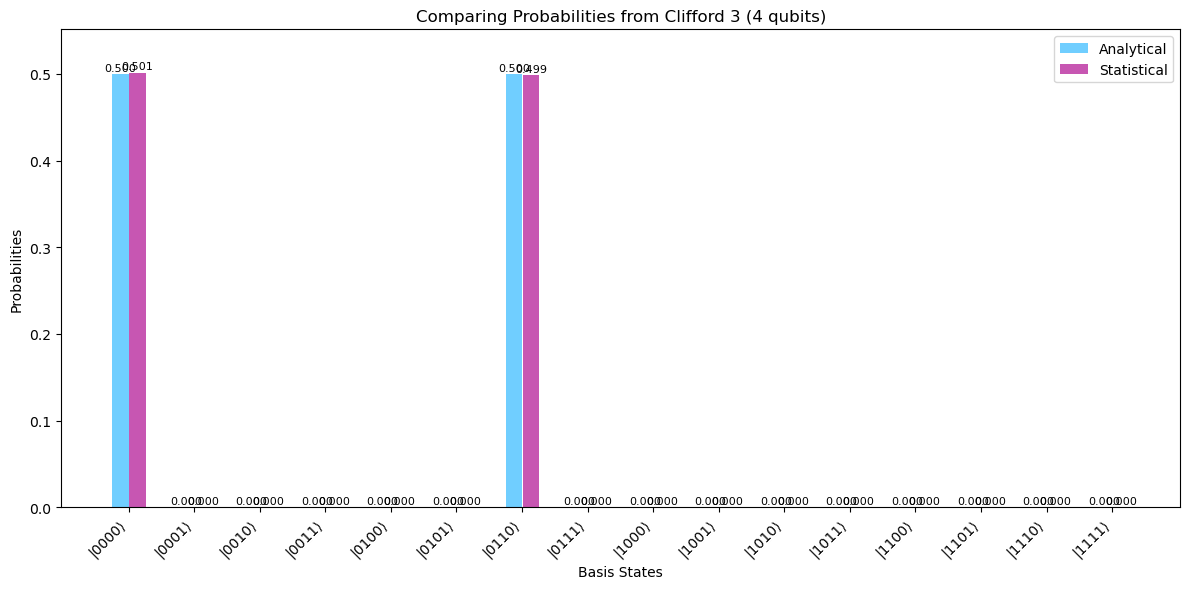

In [28]:
# Get analytical results for 4-qubit circuit
probs3, state3 = clifford3(return_state=True)

# Get the statistical results with 10000 shots
shot_probs3, _ = clifford3(return_state=False, shots=10000)

# Define computational basis states for 4 qubits
basis_states = ["|0000⟩", "|0001⟩", "|0010⟩", "|0011⟩", 
                   "|0100⟩", "|0101⟩", "|0110⟩", "|0111⟩",
                   "|1000⟩", "|1001⟩", "|1010⟩", "|1011⟩", 
                   "|1100⟩", "|1101⟩", "|1110⟩", "|1111⟩"]

# Plot the probabilities
fig, ax = plt.subplots(figsize=(12, 6))
bar_width, bar_space = 0.35, 0.02
colors = ["#70CEFF", "#C756B2"]
labels = ["Analytical", "Statistical"]

# Plot the probabilities
bar_width, bar_space = 0.25, 0.01
colors = ["#70CEFF", "#C756B2"]
labels = ["Analytical", "Statistical"]
for idx, prob in enumerate([probs3, shot_probs3]):
    bars = plt.bar(
        np.arange(16) + idx * (bar_width + bar_space), prob,
        width=bar_width, label=labels[idx], color=colors[idx],
    )
    plt.bar_label(bars, padding=1, fmt="%.3f", fontsize=8)

# Add labels and show
ax.set_title("Comparing Probabilities from Clifford 3 (4 qubits)", fontsize=12)
ax.set_xlabel("Basis States")
ax.set_ylabel("Probabilities")
ax.set_xticks(np.arange(16) + bar_width / 2)
ax.set_xticklabels(basis_states, rotation=45, ha='right')
ax.set_ylim(0.0, max(max(probs3), max(shot_probs3)) * 1.1)
ax.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()